In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#plt.style.use('classic')
%matplotlib inline

# Auxiliary functions

In [2]:
def PlotDensity(df, target_variable, numerical_feature_variable, remove_extreme_values=False):
    fig, ax = plt.subplots(figsize=(10,8))

    df_aux = df[~df[numerical_feature_variable].isna()][[target_variable, numerical_feature_variable]].copy() #remove missing
    if remove_extreme_values == True:
        value_extreme = np.quantile(df_aux[numerical_feature_variable].values, 1-0.01) #remove extreme values, because these values may harm visualization
        df_aux = df_aux[df_aux[numerical_feature_variable]<value_extreme].copy() #remove extreme values, because these values may harm visualization
    
    df_aux_1 = df_aux[df_aux[target_variable] == 1].copy() # select default group
    df_aux_0 = df_aux[df_aux[target_variable] == 0].copy() # select non default group
    
    df_aux_1.columns = [target_variable, 'Default']
    df_aux_0.columns = [target_variable, 'NonDefault']
    
    sns.kdeplot(df_aux_1['Default'], shade=True, ax=ax) #display density
    sns.kdeplot(df_aux_0['NonDefault'], shade=True, ax=ax) #display density

In [3]:
def BarPlot(df, target_variable, categorical_feature):
    fig, ax = plt.subplots(figsize=(10,8))
    df_aux = df[[target, categorical_feature]].copy()

    aux_result = df_aux[[target, categorical_feature]].groupby(by = categorical_feature).mean()

    vec_bad_rate = aux_result[target].values
    #vec_categs  = ['c_'  + str(c) for c in aux_result.index.values]
    vec_categs  = [int(c) for c in aux_result.index.values]

    df_aux = pd.DataFrame(columns=[categorical_feature, 'BadRate'])
    df_aux[categorical_feature] = vec_categs
    df_aux['BadRate'] = vec_bad_rate
    #df_aux.sort_values(by='BadRate', inplace=True)
    sns.barplot(x=categorical_feature, y="BadRate", data=df_aux, ax=ax)

In [4]:
def ks(df, target_variable, score_variable):
    
    n0_total = df[df[target_variable]==0].shape[0]
    n1_total = df[df[target_variable]==1].shape[0]
    ks_value=0
    for t in df[score_variable].values:
        df_ks = df[df[score_variable]<=t].copy()

        n0 = df_ks[df_ks[target_variable]==0].shape[0]
        n1 = df_ks[df_ks[target_variable]==1].shape[0]

        p0 = n0*1.0/n0_total
        p1 = n1*1.0/n1_total
        ks_aux = abs(p0-p1)

        if ks_aux>ks_value:
            ks_value = ks_aux
            
    return ks_value

## Separating data variables in two sets
1 - target variable

2 - features variables (predictive variables)

In [5]:
target = 'SeriousDlqin2yrs'
features_variables = ['RevolvingUtilizationOfUnsecuredLines', 'age',
                      'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                      'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                      'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                      'NumberOfDependents']

## Loading Data
* showing first lines in dataset

In [6]:
df_dados = pd.read_csv('../cs-training.csv')

In [7]:
df_dados.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Bad rate

In [8]:
print("Dataset badrate(%):",np.round(np.mean(df_dados[target].values)*100,2))

Dataset badrate(%): 6.68


## Showing missing percentage of each feature

In [9]:
for c in features_variables:
    n = df_dados[df_dados[c].isna()].shape[0]
    perc = str(np.round((n*1.0/df_dados.shape[0])*100,2))+'%'
    if n>0:
        print('Feature:', c, ' - ', 'Mumber Missing:', n, ' - ', perc)

Feature: MonthlyIncome  -  Mumber Missing: 29731  -  19.82%
Feature: NumberOfDependents  -  Mumber Missing: 3924  -  2.62%


# Density plot for each variable
* Comparing groups: Default and non default

### RevolvingUtilizationOfUnsecuredLines

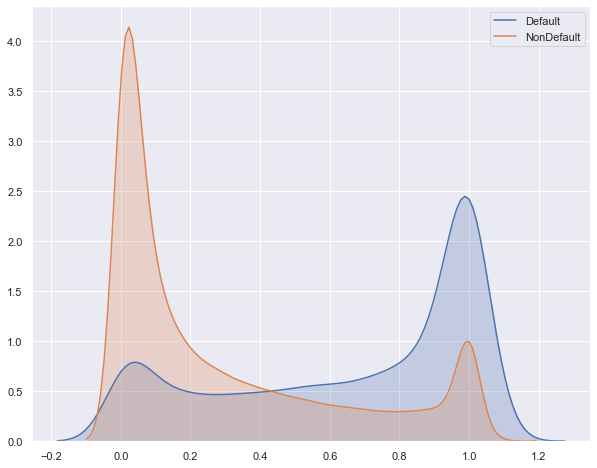

In [10]:
PlotDensity(df_dados, target, 'RevolvingUtilizationOfUnsecuredLines', True)

### age

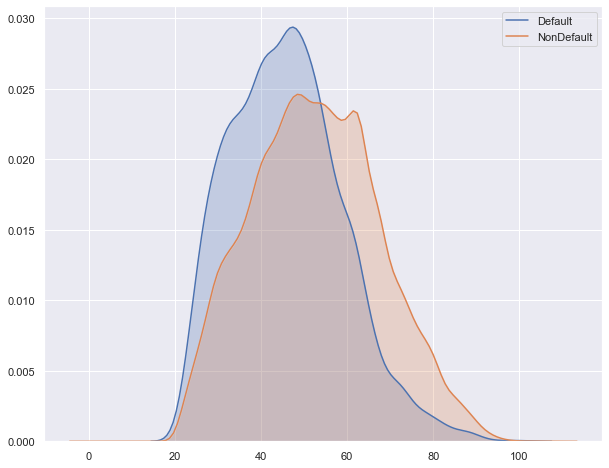

In [11]:
PlotDensity(df_dados, target, 'age', False)

### DebtRatio

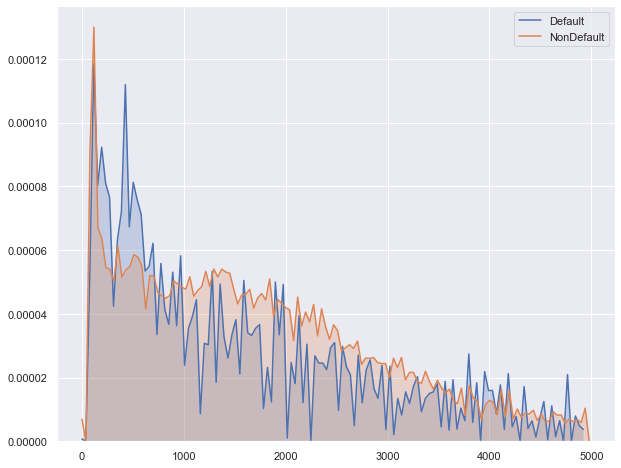

In [12]:
PlotDensity(df_dados, target, 'DebtRatio', True)

### MonthlyIncome

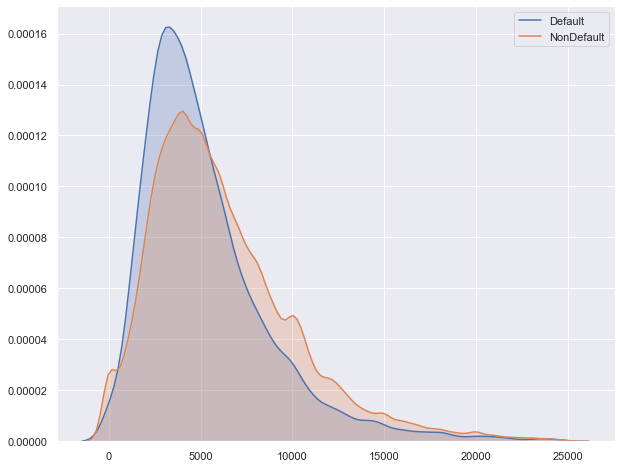

In [13]:
PlotDensity(df_dados, target, 'MonthlyIncome', True)

### NumberOfOpenCreditLinesAndLoans

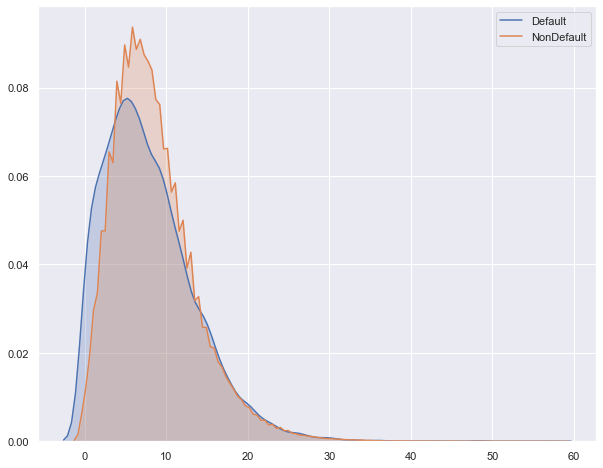

In [14]:
PlotDensity(df_dados, target, 'NumberOfOpenCreditLinesAndLoans', False)

### NumberRealEstateLoansOrLines

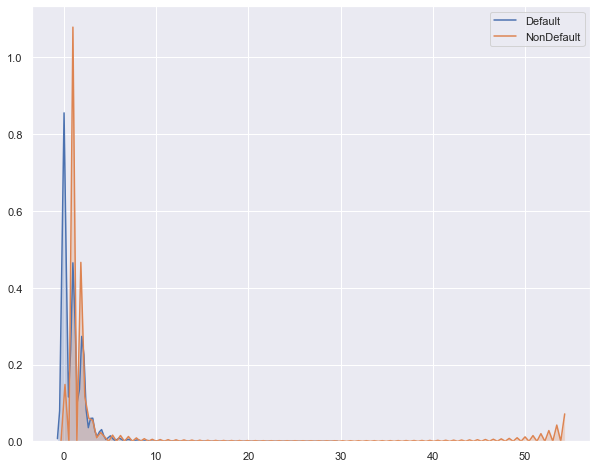

In [15]:
PlotDensity(df_dados, target, 'NumberRealEstateLoansOrLines', False)

### NumberOfDependents

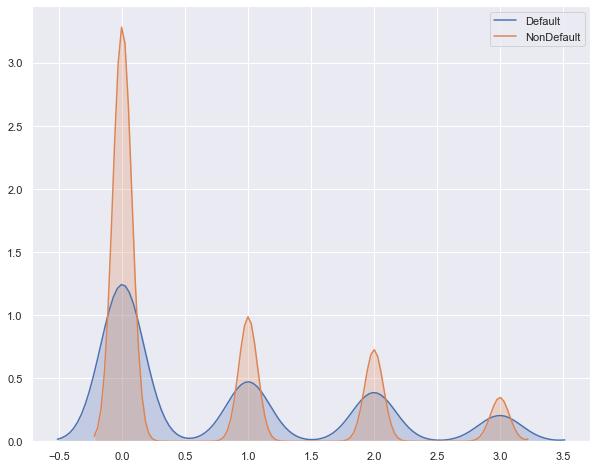

In [16]:
PlotDensity(df_dados, target, 'NumberOfDependents', True)

## Comments

Analysing the graphs above, we notice there is difference between tow groups(default and non default). However, none of the features variables are extremely powerfull in prediction default event. So, an algorithm(model part) will find the best combination of these variabels in order to estimate the risk of the customers.

# Barplot to analyse how bad rate behaves in each feature variable
In this part I decided to use bar plot to visualize default event behaviour

### NumberRealEstateLoansOrLines

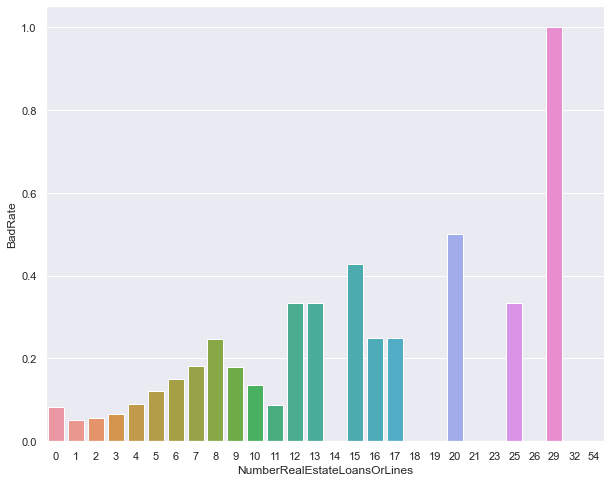

In [17]:
BarPlot(df_dados, target, 'NumberRealEstateLoansOrLines')

### NumberOfDependents

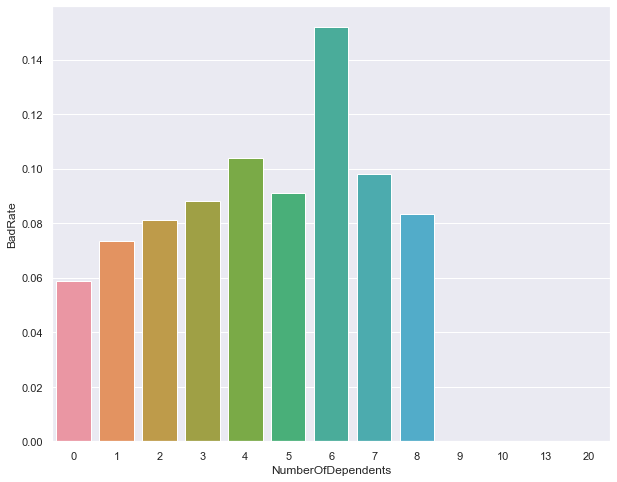

In [18]:
BarPlot(df_dados, target, 'NumberOfDependents')

### NumberOfTime60-89DaysPastDueNotWorse

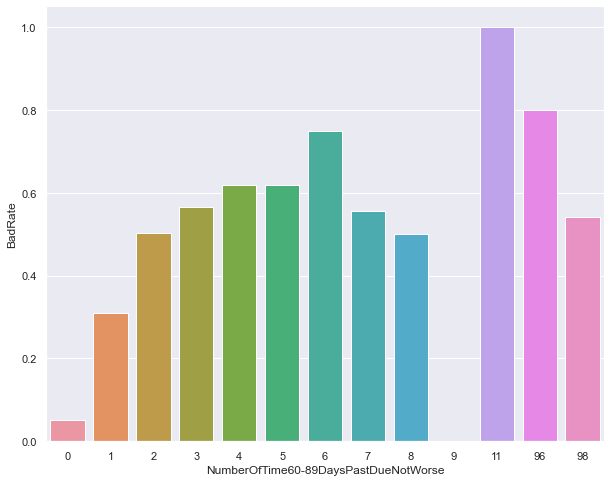

In [19]:
BarPlot(df_dados, target, 'NumberOfTime60-89DaysPastDueNotWorse')

In [20]:
#This graph is not good for discrete data
#PlotDensity(df_dados, target, 'NumberOfTime60-89DaysPastDueNotWorse', False)

### NumberOfTimes90DaysLate

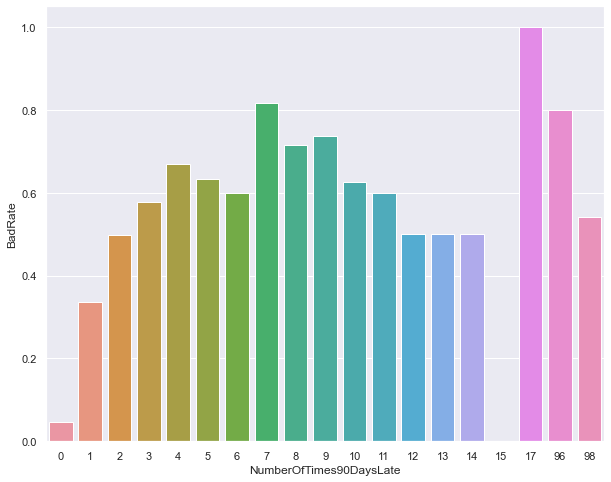

In [21]:
BarPlot(df_dados, target, 'NumberOfTimes90DaysLate')

In [22]:
#This graph is not good for discrete data
#PlotDensity(df_dados, target, 'NumberOfTimes90DaysLate', False)

### NumberOfTime30-59DaysPastDueNotWorse

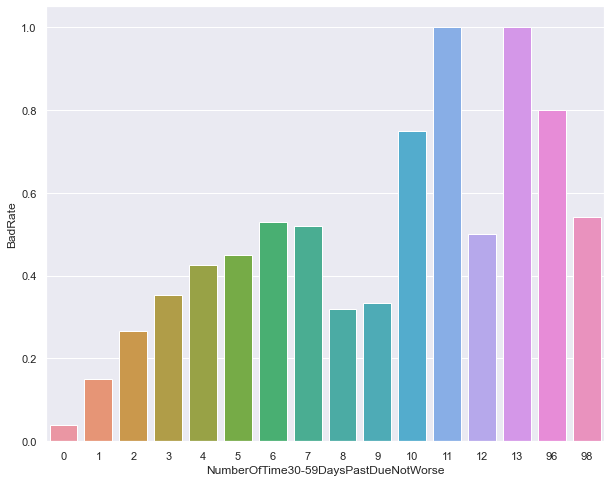

In [23]:
BarPlot(df_dados, target, 'NumberOfTime30-59DaysPastDueNotWorse')

In [24]:
#This graph is not good for discrete data
#PlotDensity(df_dados, target, 'NumberOfTime30-59DaysPastDueNotWorse', False)

## Comments

* According to intuition, it would be more natural observe an perfect positive correlation between bad rate(default rate) and number of times past due. However, we observe some invertions, for example, for feature NumberOfTime30-59DaysPastDueNotWorse, the bad rate in values 8 and 9 are less then bad rate in values in 5,6 and 7.

## Analysing missing values

* The idea here is verify if missing value is "similar" with other value of the feature. For example, considering feature NumberOfDependents values 3 and 5 have similar bad rates. Im using bad rate here to compare things because the project goal is predict default event.

### NumberOfDependents

* Let's input a negative number in this variable and use our barplot function to compare bad rate of missing value with other values.
* For this feature variable(NumberOfDependents) missing value seems to have a lower risk.
* Let's use -1 to indicate missing value, this value will not create problems for tree algorithms when estimating customer risk.

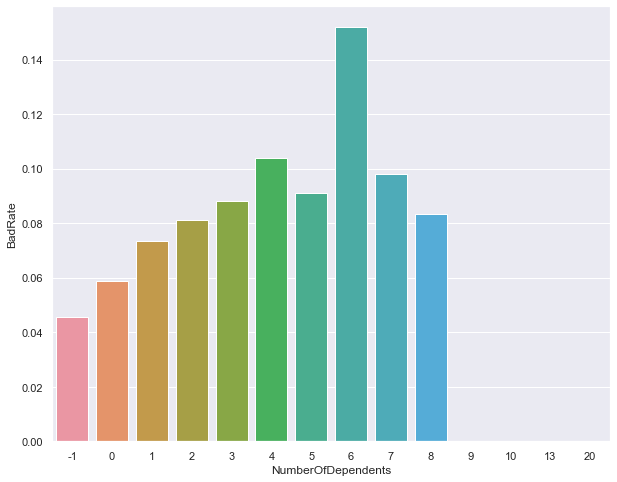

In [25]:
df_aux_missing = df_dados[[target, 'NumberOfDependents']].copy()
df_aux_missing['NumberOfDependents'] = df_aux_missing['NumberOfDependents'].fillna(-1)
BarPlot(df_aux_missing, target, 'NumberOfDependents')

### MonthlyIncome
* Let´s create 10 intervals for MonthlyIncome feature and evaluate bad rate in each interval and compare with missing value
* Interesting notice a negative correlation in income and default event, i.e, when the income increase the risk(bad rate or default rate) tends to decrease. 

In [26]:
lst_bad_rate = list()
lst_label = list()

lst_decs = [(x+1)/10 for x in range(10)]
vec_income = df_dados[~df_dados['MonthlyIncome'].isna()]['MonthlyIncome'].values

for i in range(10):
    label = 'bin_' + str(i+1)
    if i==0:
        a = 0
        b = np.quantile(vec_income,lst_decs[i])
    else:
        a = np.quantile(vec_income,lst_decs[i-1])
        b = np.quantile(vec_income,lst_decs[i])
    
    df_aux = df_dados[~df_dados['MonthlyIncome'].isna()][[target, 'MonthlyIncome']].copy()
    df_aux = df_aux[df_aux['MonthlyIncome']>a].copy()
    df_aux = df_aux[df_aux['MonthlyIncome']<=b].copy()
    bad_rate = np.mean(df_aux[target].values)
    mean_income = np.mean(df_aux['MonthlyIncome'].values)
    
    lst_label.append(label)
    lst_bad_rate.append(np.round(bad_rate*100,2))
    print("Label:",label,"BadRate:",np.round(bad_rate*100,2), 'Mean MonthlyIncome:', mean_income)

    
lst_label.append('Missing')
lst_bad_rate.append(np.round(100*(np.mean(df_dados[df_dados['MonthlyIncome'].isna()][target].values)),2))

Label: bin_1 BadRate: 9.13 Mean MonthlyIncome: 1302.43602078122
Label: bin_2 BadRate: 9.67 Mean MonthlyIncome: 2584.1518075980393
Label: bin_3 BadRate: 9.11 Mean MonthlyIncome: 3432.464935523759
Label: bin_4 BadRate: 8.09 Mean MonthlyIncome: 4175.131345069219
Label: bin_5 BadRate: 7.33 Mean MonthlyIncome: 4975.39764069796
Label: bin_6 BadRate: 6.68 Mean MonthlyIncome: 5854.139831223629
Label: bin_7 BadRate: 5.93 Mean MonthlyIncome: 6921.715812484819
Label: bin_8 BadRate: 5.11 Mean MonthlyIncome: 8282.706468933777
Label: bin_9 BadRate: 4.52 Mean MonthlyIncome: 10237.453096614368
Label: bin_10 BadRate: 4.49 Mean MonthlyIncome: 19351.13157010915


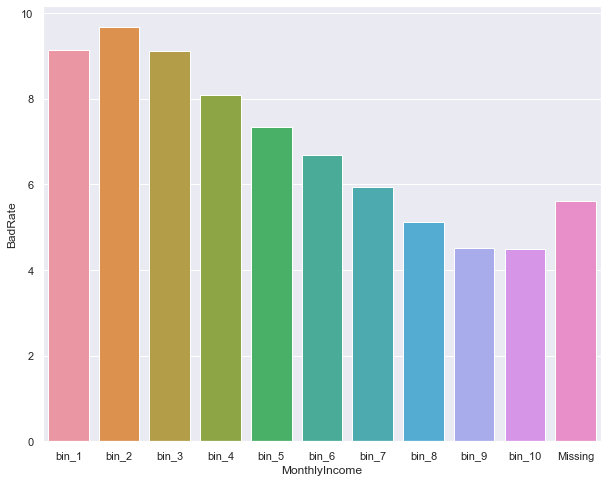

In [27]:
df_aux = pd.DataFrame(columns=['MonthlyIncome', 'BadRate'])
df_aux['MonthlyIncome'] = lst_label
df_aux['BadRate'] = lst_bad_rate

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='MonthlyIncome', y="BadRate", data=df_aux, ax=ax)

In [28]:
df_aux

,MonthlyIncome,BadRate
0,bin_1,9.13
1,bin_2,9.67
2,bin_3,9.11
3,bin_4,8.09
4,bin_5,7.33
5,bin_6,6.68
6,bin_7,5.93
7,bin_8,5.11
8,bin_9,4.52
9,bin_10,4.49


* Using the bar plot and table above, we can see missing values in feature variable MonthlyIncome has aproximate same bad rate(risk) that bin_7. So, we can use bin_7 MonthlyIncome mean value to input missing values.
* Mean value in bin_7: 6921.72

### Creating New Features

#### Let's create two new featues
* Income/number of dependents >>>> income per capta
* TotalNumberOfTimeDaysPastDue 

### Income per capta

In [29]:
df_aux = df_dados[[target, 'MonthlyIncome', 'NumberOfDependents']].copy()
df_aux['MonthlyIncome'] = df_aux['MonthlyIncome'].fillna(6921.72)
df_aux['NumberOfDependents'] = df_aux['NumberOfDependents'].fillna(-1)

df_aux['income_per_capta'] = df_aux[['MonthlyIncome', 'NumberOfDependents']].apply(lambda x: x[0]/x[1] if x[1] != 0 and x[1] != -1 else x[0], axis=1).values

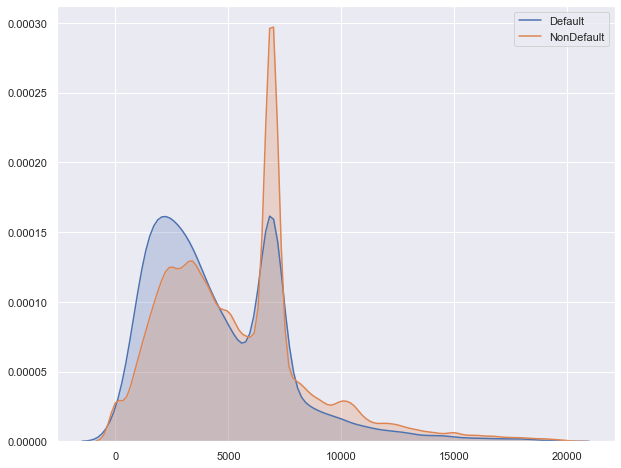

In [30]:
PlotDensity(df_aux, target, 'income_per_capta', True)

In [31]:
ks(df_aux.sample(frac=0.1, replace=False, random_state=12345), target, 'income_per_capta')

0.1358490970484194

## TotalNumberOfTimeDaysPastDue 

In [32]:
df_aux = df_dados[[target, 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',  'NumberOfTime60-89DaysPastDueNotWorse']].copy()

df_aux['TotalNumberOfTimeDaysPastDue'] = df_aux[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']].apply(lambda x: x[0]+x[1]+x[2], axis=1).values

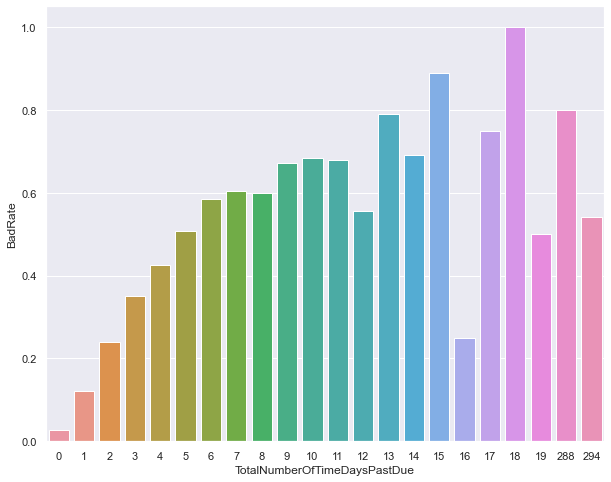

In [33]:
BarPlot(df_aux, target, 'TotalNumberOfTimeDaysPastDue')

In [34]:
ks(df_aux.sample(frac=0.1, replace=False, random_state=12345), target, 'TotalNumberOfTimeDaysPastDue')

0.5016889760279556

## Comments

* I'm going to use ensemble trees(boosting) to model default event because, these models have achieved very good results in literature and are able to capture non linear relationship as showed by NumberOfTime30-59DaysPastDueNotWorse feature and others. Moreover, these algorithm are able to combine variables in order to estimate the customer credit risk.